In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Hàm IoU (từ code bạn cung cấp)
def intersection_over_union(boxes_preds, boxes_labels, box_format="midpoint"):
    if box_format == "midpoint":
        box1_x1 = boxes_preds[..., 0:1] - boxes_preds[..., 2:3] / 2
        box1_y1 = boxes_preds[..., 1:2] - boxes_preds[..., 3:4] / 2
        box1_x2 = boxes_preds[..., 0:1] + boxes_preds[..., 2:3] / 2
        box1_y2 = boxes_preds[..., 1:2] + boxes_preds[..., 3:4] / 2
        box2_x1 = boxes_labels[..., 0:1] - boxes_labels[..., 2:3] / 2
        box2_y1 = boxes_labels[..., 1:2] - boxes_labels[..., 3:4] / 2
        box2_x2 = boxes_labels[..., 0:1] + boxes_labels[..., 2:3] / 2
        box2_y2 = boxes_labels[..., 1:2] + boxes_labels[..., 3:4] / 2
    elif box_format == "corners":
        box1_x1 = boxes_preds[..., 0:1]
        box1_y1 = boxes_preds[..., 1:2]
        box1_x2 = boxes_preds[..., 2:3]
        box1_y2 = boxes_preds[..., 3:4]
        box2_x1 = boxes_labels[..., 0:1]
        box2_y1 = boxes_labels[..., 1:2]
        box2_x2 = boxes_labels[..., 2:3]
        box2_y2 = boxes_labels[..., 3:4]

    x1 = torch.max(box1_x1, box2_x1)
    y1 = torch.max(box1_y1, box2_y1)
    x2 = torch.min(box1_x2, box2_x2)
    y2 = torch.min(box1_y2, box2_y2)

    intersection = (x2 - x1).clamp(0) * (y2 - y1).clamp(0)
    box1_area = abs((box1_x2 - box1_x1) * (box1_y2 - box1_y1))
    box2_area = abs((box2_x2 - box2_x1) * (box2_y2 - box2_y1))

    return intersection / (box1_area + box2_area - intersection + 1e-6)

IoU cho từng cặp hộp: [[0.69024855]
 [0.7633508 ]]


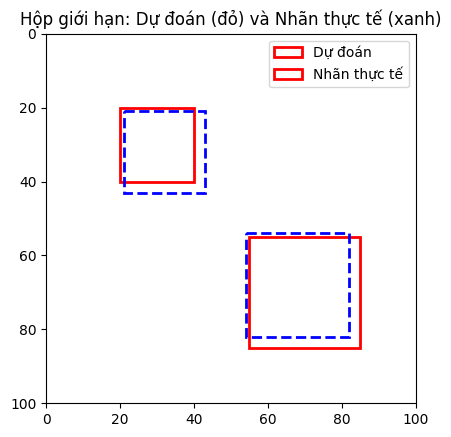

In [4]:
# Định nghĩa hộp giới hạn (định dạng midpoint: [x_center, y_center, width, height])
boxes_preds = torch.tensor([
    [30, 30, 20, 20],  # Hộp 1 dự đoán
    [70, 70, 30, 30]   # Hộp 2 dự đoán
], dtype=torch.float32)

boxes_labels = torch.tensor([
    [32, 32, 22, 22],  # Hộp 1 nhãn thực tế
    [68, 68, 28, 28]   # Hộp 2 nhãn thực tế
], dtype=torch.float32)

# Tính IoU
iou = intersection_over_union(boxes_preds, boxes_labels, box_format="midpoint")
print("IoU cho từng cặp hộp:", iou.numpy())

# Vẽ hình ảnh và hộp giới hạn
# Tạo ảnh giả lập (100x100, màu trắng)
image = np.ones((100, 100, 3))  # Ảnh trắng RGB

# Tạo figure và axes
fig, ax = plt.subplots(1)
ax.imshow(image)  # Hiển thị ảnh

# Chuyển đổi hộp midpoint sang corners để vẽ
def midpoint_to_corners(box):
    x1 = box[0] - box[2] / 2
    y1 = box[1] - box[3] / 2
    w = box[2]
    h = box[3]
    return x1, y1, w, h

# Vẽ các hộp dự đoán (màu đỏ, nét liền)
for box in boxes_preds:
    x1, y1, w, h = midpoint_to_corners(box)
    rect = patches.Rectangle((x1, y1), w, h, linewidth=2, edgecolor='r', facecolor='none', label='Dự đoán')
    ax.add_patch(rect)

# Vẽ các hộp nhãn thực tế (màu xanh, nét đứt)
for box in boxes_labels:
    x1, y1, w, h = midpoint_to_corners(box)
    rect = patches.Rectangle((x1, y1), w, h, linewidth=2, edgecolor='b', facecolor='none', linestyle='--', label='Nhãn thực tế')
    ax.add_patch(rect)

# Thiết lập giới hạn trục và hiển thị
ax.set_xlim(0, 100)
ax.set_ylim(100, 0)  # Đảo ngược trục y để khớp với hệ tọa độ ảnh
plt.title("Hộp giới hạn: Dự đoán (đỏ) và Nhãn thực tế (xanh)")
plt.legend(['Dự đoán', 'Nhãn thực tế'])
plt.show()